In [71]:
# DATA PREPARATION
import os
import pandas as pd

# data path
#extract_dir = '/Users/shivapourfeilieh/Downloads/dsl project'


# Load the datasets
df = pd.read_csv('development.csv')
df_eval = pd.read_csv('evaluation.csv')

# keep the original dataset
df1_dev = df.copy()
df1_eval = df_eval.copy()

# concat both df
df_concat = pd.concat([df, df_eval], ignore_index=True)

# Display samples
print("\nDevelopment Set:")
df.head()

print("\nEvaluation Set:")
df_eval.head()



Development Set:

Evaluation Set:


,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,id
0,housing/rent/apartment,Canton - come and see this one.,This is a two beds apartment with all utilitie...,NaN,1.0,2.0,USD,No,Yes,NaN,Monthly,816,NaN,Canton,OH,40.7992,-81.3533,RentDigs.com,1568759424,0
1,housing/rent/apartment,"Great Central Location Two BR, Two BA","Square footage: 1028 square feet, unit number:...","AC,Gym,Pool",2.0,2.0,USD,No,Yes,"Cats,Dogs",Monthly,1028,NaN,Rancho Cucamonga,CA,34.1251,-117.5239,RentDigs.com,1544268426,1
2,housing/rent/apartment,"Apartment only for $1,326/mo. You Can Stop Loo...","Square footage: 733 square feet, unit number: ...",Parking,1.0,1.0,USD,No,Thumbnail,NaN,Monthly,733,NaN,Las Vegas,NV,36.1132,-115.2754,RentDigs.com,1568750345,2
3,housing/rent/apartment,Studio apartment 2231 E. 67th St.,"This unit is located at 2231 E. 67th St., Chic...","Cable or Satellite,Clubhouse,Dishwasher,Doorma...",1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",Monthly,428,2231 E 67th St,Chicago,IL,41.8625,-87.6825,RentLingo,1577358588,3
4,housing/rent/apartment,Convenient location Two BR Two BA for rent,"Square footage: 1126 square feet, unit number:...","Clubhouse,Gym,Pool",2.0,2.0,USD,No,Yes,"Cats,Dogs",Monthly,1126,NaN,Kissimmee,FL,28.3078,-81.4213,RentDigs.com,1568759148,4


In [72]:
# DATA EXPLORATION
df.shape

(79589, 21)

In [73]:
# DATA EXPLORATION
print(len(df))
print(len(df_eval))
print(len(df_concat))

79589
19898
99487


In [74]:
# DATA EXPLORATION
df_concat.isnull().sum()

category            0
title               0
body                0
amenities       16044
bathrooms          62
bedrooms          123
currency            0
fee                 0
has_photo           0
pets_allowed    60422
price           19898
price_type          0
square_feet         0
address         91546
cityname          302
state             302
latitude           25
longitude          25
source              0
time                0
id                  0
dtype: int64

In [75]:
# DATA EXPLORATION
df.dtypes

category         object
title            object
body             object
amenities        object
bathrooms       float64
bedrooms        float64
currency         object
fee              object
has_photo        object
pets_allowed     object
price           float64
price_type       object
square_feet       int64
address          object
cityname         object
state            object
latitude        float64
longitude       float64
source           object
time              int64
id                int64
dtype: object

In [76]:
df0 = df
df_c = df_concat

In [77]:
df_c["text_combined"] = (
    df_c["title"].fillna("") + " " + df_c["body"].fillna("")
).str.lower()

In [78]:
# LIST CITIES THAT REPLICATE MORE THAN 5 TIMES
city_counts = df_c["cityname"].dropna().str.lower().value_counts()
valid_cities = city_counts[city_counts > 5].index.tolist()

In [79]:
# CONCAT BODY AND TITLE TO FIND THE LOCATION DETAILS
df_c["text_location"] = (df_c["title"].fillna("") + " " + df_c["body"].fillna("")).str.lower()

In [80]:
# FINDING THE UNIQUE CITYNAMES FROM THE RELATED COLUMN
import re

mask_missing_city = df_c["cityname"].isna()

def match_city(text, cities):
    for city in cities:
        pattern = r"\b" + re.escape(city) + r"\b"
        if re.search(pattern, text):
            return city
    return None

# APPLY ON THE ROWS WITHOUT CITYNAME
df_c.loc[mask_missing_city, "matched_city_from_text"] = df_c.loc[
    mask_missing_city, "text_location"
].apply(lambda x: match_city(x, valid_cities))

In [81]:
# MERGE ORIGINAL CITYNAME AND FOUNDED CITYNAME
df_c.loc[
    mask_missing_city & df_c["matched_city_from_text"].notna(),
    "cityname"
] = df_c.loc[
    mask_missing_city & df_c["matched_city_from_text"].notna(),
    "matched_city_from_text"
].str.title()

In [82]:
# CHECKED UNIQUE VALUES
df_c["matched_city_from_text"].unique()

array([nan, None, 'commerce', 'new york', 'milton', 'plainsboro',
       'virginia beach', 'brunswick', 'boston', 'raleigh', 'chesapeake',
       'san antonio', 'chesterfield', 'west jordan', 'norfolk',
       'falls church', 'morrisville', 'redding', 'ridgewood', 'mansfield',
       'knoxville', 'melbourne', 'sterling', 'melrose', 'anaheim',
       'oxnard', 'lafayette', 'wexford', 'wyoming', 'austin', 'clinton',
       'wilson', 'windsor', 'manchester', 'lincoln', 'williamstown',
       'berkeley', 'plymouth', 'seattle', 'woodridge', 'manhattan'],
      dtype=object)

In [83]:
df_c["matched_city_from_text"].isna().sum()

99284

In [84]:
# CREATE CITYNAME_CLEANED
df_c["cityname_cleaned"] = df_c["cityname"]  

# REPLACE NAN VALUE CITYNAME WITH MATCHED
mask_missing_city = df_c["cityname"].isna()
df_c.loc[
    mask_missing_city & df_c["matched_city_from_text"].notna(),
    "cityname_cleaned"
] = df_c.loc[
    mask_missing_city & df_c["matched_city_from_text"].notna(),
    "matched_city_from_text"
].str.title()

df_c["cityname_cleaned"] = df_c["cityname_cleaned"].fillna("other_city")

In [85]:
# DATA EXPLORATION
df_c["cityname_cleaned"].isna().sum()

0

In [86]:
# USE AVERAGE LAT/LON FOR EACH CITY (FROM ROWS THAT HAVE COORDINATES)
city_coords = (
    df_c[df_c["latitude"].notna() & df_c["longitude"].notna()]
    .groupby(df_c["cityname_cleaned"].str.lower())
    [["latitude", "longitude"]]
    .mean()
    .to_dict("index")
)

In [87]:
# FIND CITYNAME WITH NAN VALUE LATITUDE AND LONGTITUDE AND FILL IT WITH THE KMEANS OF THIS TOWN
def fill_coords_from_city(row):
    if pd.isna(row["latitude"]) or pd.isna(row["longitude"]):
        city = str(row["cityname_cleaned"]).strip().lower()
        if city in city_coords:
            lat = city_coords[city]["latitude"]
            lon = city_coords[city]["longitude"]
            return pd.Series([lat, lon])
    return pd.Series([row["latitude"], row["longitude"]])

In [88]:
# APPLY fill_coords_from_city function
df_c[["latitude", "longitude"]] = df_c.apply(fill_coords_from_city, axis=1)

In [89]:
num_still_missing = df_c["longitude"].isna().sum()
print(f"# missing longitude: {num_still_missing}")

# missing longitude: 0


In [90]:
# ENCODE CITYNAME

top_cities = df_c["cityname_cleaned"].value_counts().nlargest(20).index.tolist()

df_c["cityname_grouped"] = df_c["cityname_cleaned"].apply(
    lambda x: x if x in top_cities else "other"
)

city_ohe = pd.get_dummies(df_c["cityname_grouped"], prefix="city")
df_c = pd.concat([df_c, city_ohe], axis=1)

In [91]:
print(city_ohe.columns.tolist())

['city_Alexandria', 'city_Arlington', 'city_Atlanta', 'city_Boston', 'city_Charlotte', 'city_Chicago', 'city_Cincinnati', 'city_Colorado Springs', 'city_Columbus', 'city_Dallas', 'city_Denver', 'city_Houston', 'city_Las Vegas', 'city_Los Angeles', 'city_Norfolk', 'city_Raleigh', 'city_Richmond', 'city_San Antonio', 'city_San Diego', 'city_Tampa', 'city_other']


In [92]:
df_c1 = df_c

In [93]:
df_c1[df_c1["bathrooms"].isna()][["title", "body", "bedrooms", "bathrooms"]]

,title,body,bedrooms,bathrooms
258,"Two BR Unfurnished Apartment $720/mo, Laramie,...","Wood flooring, sunny 2 beds unfurnished apartm...",2.0,NaN
455,One BR Lions Court Apartments: 1200 Thompson Road,This unit is located at Lions Court Apartments...,1.0,NaN
6153,"Three BR Apartment at 803 Roundhouse Addt, Mar...",Community living at its finest nestled next to...,3.0,NaN
12203,"Studio apartment 15th St SE, Independence Ave ...","This unit is located at 15th St SE, Independen...",0.0,NaN
12434,Studio apartment 8197 14th Avenue South,This unit is located at 8197 14th Avenue South...,0.0,NaN
...,...,...,...,...
93822,Prominence Apartments Two BR Luxury Apartment ...,"When you come home after a long day, youre loo...",2.0,NaN
95018,One BR 2431 Madison Ave,"This unit is located at 2431 Madison Ave, Balt...",1.0,NaN
95241,Super Cute! Apartment for Rent!,"Square footage: 1090 sq. feet, unit number: 34...",2.0,NaN
96091,Basement Efficiency Apartment - Monthly (Denve...,"Harvard Gulch / Rosedale, 1 Block North of Por...",1.0,NaN


start to work on the bedrooms and bathrooms 

In [94]:
# CREATE A RANGE BASED ON THE SQUARE_FEET
df_c1["size_range"] = pd.cut(
    df_c1["square_feet"],
    bins=[0, 500, 1000, 1500, 2000, 10000],
    include_lowest=True
)


# BEDROOMS
# FALLBACK BASED ON THE SIZE_RANGE
df_c1["bedrooms_filled"] = df_c1.groupby(["cityname_cleaned", "size_range"])["bedrooms"].transform(
    lambda x: x.fillna(x.median())
)

df_c1["bedrooms_filled"] = df_c1.groupby("size_range")["bedrooms_filled"].transform(
    lambda x: x.fillna(x.median())
)

df_c1["bedrooms_filled"] = df_c1["bedrooms_filled"].fillna(df_c1["bedrooms"].median())
df_c1["bedrooms"] = df_c1["bedrooms"].fillna(df_c1["bedrooms_filled"])


# BATHROOMS
df_c1["bathrooms_filled"] = df_c1.groupby(["cityname_cleaned", "size_range"])["bathrooms"].transform(
    lambda x: x.fillna(x.median())
)

# FALLBACK BASED ON THE SIZE_RANGE
df_c1["bathrooms_filled"] = df_c1.groupby("size_range")["bathrooms_filled"].transform(
    lambda x: x.fillna(x.median())
)

# FILL THE REST WITH MEDIAN VALUE
df_c1["bathrooms_filled"] = df_c1["bathrooms_filled"].fillna(df_c1["bathrooms"].median())

df_c1["bathrooms"] = df_c1["bathrooms"].fillna(df_c1["bathrooms_filled"])
df_c1.drop(columns=["bedrooms_filled", "bathrooms_filled"], inplace=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_194144\4277739887.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_c1["bedrooms_filled"] = df_c1.groupby(["cityname_cleaned", "size_range"])["bedrooms"].transform(
C:\Users\rahul\AppData\Local\Temp\ipykernel_194144\4277739887.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_c1["bedrooms_filled"] = df_c1.groupby("size_range")["bedrooms_filled"].transform(
C:\Users\rahul\AppData\Local\Temp\ipykernel_194144\4277739887.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

In [95]:
df_c1["bathrooms"].isna().sum()

0

work on the amenities

In [96]:
df_c3 = df_c1

In [97]:
df_c["text_combined"].head(10)

0    move-in condition, two br one ba. $760/mo coba...
1    this apartment is a must see! awesome recently...
2    euless luxurious 1 + 1 the arbors of euless ap...
3    move-in condition, two br two ba secluded surr...
4    prominence apartments two br luxury apartment ...
5    apartment - kansas city - come and see this on...
6    henderson luxurious 3 + 2 square footage: 1528...
7    the is an urban lifestyle destination located ...
8    this apartment is a must see! 1st level has wo...
9    is s josephine denver, co and is. denver, a re...
Name: text_combined, dtype: object

In [98]:
df_c3["amenities"] = df_c3["amenities"].fillna("")
amenity_series = df_c3["amenities"].str.split(",").explode().str.strip().str.lower()
unique_amenities = amenity_series.dropna().unique().tolist()
print(unique_amenities)

['clubhouse', 'playground', 'garbage disposal', 'parking', 'storage', 'washer dryer', 'wood floors', 'fireplace', 'patio/deck', '', 'cable or satellite', 'dishwasher', 'gated', 'pool', 'gym', 'ac', 'refrigerator', 'tennis', 'hot tub', 'internet access', 'elevator', 'basketball', 'view', 'tv', 'alarm', 'luxury', 'doorman', 'golf']


In [99]:
def count_amenities_in_text(text, amenity_list):
    return sum(1 for amenity in amenity_list if amenity in text)

In [100]:
df_c3["amenity_count_from_text"] = df_c1["text_combined"].apply(
    lambda x: count_amenities_in_text(x, unique_amenities)
)

In [101]:
df_c3[["id", "amenities", "amenity_count_from_text"]].head(10)

,id,amenities,amenity_count_from_text
0,0,"Clubhouse,Playground",3
1,1,"Garbage Disposal,Parking,Storage,Washer Dryer,...",5
2,2,"Clubhouse,Fireplace,Parking,Patio/Deck,Storage...",5
3,3,,2
4,4,Washer Dryer,4
5,5,,2
6,6,Parking,3
7,7,,1
8,8,"Washer Dryer,Wood Floors",2
9,9,"Cable or Satellite,Dishwasher,Gated",4


====>>> pets allowed

In [102]:
# ENCODING PETS_ALLOWED

df_c3["pets_allowed_cleaned"] = df_c3["pets_allowed"].fillna("").str.lower()

df_c3["pets_final"] = df_c3["pets_allowed_cleaned"].apply(
    lambda x: 1 if any(term in x for term in ["yes", "dog", "cat"]) else 0
)

In [103]:
df_c3["pets_final"].isna().sum()

0

In [104]:
df_c3.groupby("source")["price"].agg(["count", "mean"]).sort_values("mean", ascending=False)

,count,mean
source,,
Nest Seekers,4,8066.500000
BostonApartments,74,3006.513514
HousesForRent,1,2500.000000
RENTOCULAR,14,2343.285714
RealRentals,214,2232.836449
Listanza,24,2226.875000
RENTCafé,34,1932.147059
vFlyer,4,1577.500000
RentDigs.com,72716,1530.629751


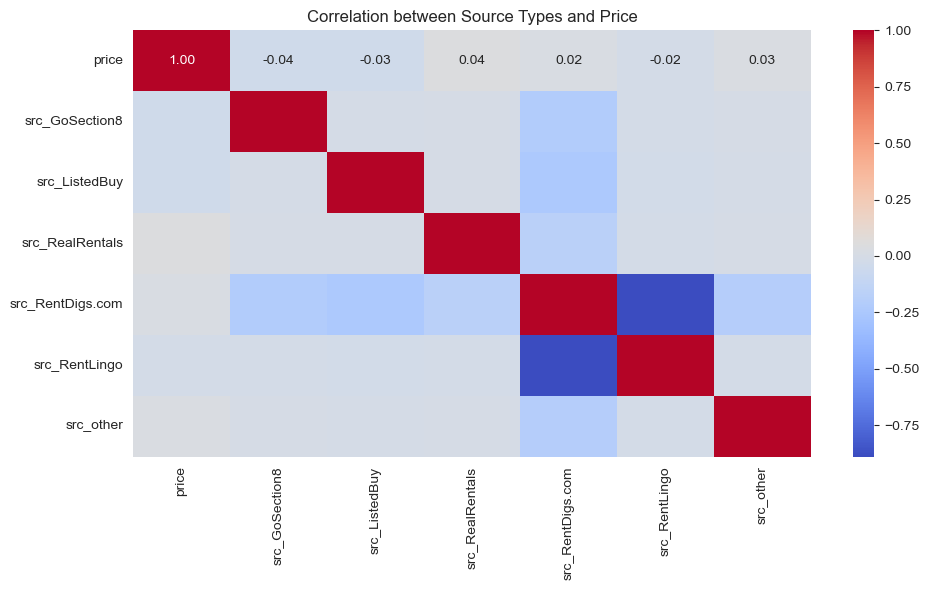

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

top_sources = df_c1["source"].value_counts().nlargest(5).index.tolist()
df_c1["source_simplified"] = df_c1["source"].apply(lambda x: x if x in top_sources else "other")

source_dummies = pd.get_dummies(df_c1["source_simplified"], prefix="src")
df_temp = pd.concat([df_c1[["price"]], source_dummies], axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(df_temp.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Source Types and Price")
plt.tight_layout()
plt.show()

others

In [106]:
df_c2 = df_c3

In [107]:
# fill out nan values in fee column
df_c2['fee'] = df_c2['fee'].replace('No',0)
df_c2['fee'] = df_c2['fee'].replace('Yes',1)

C:\Users\rahul\AppData\Local\Temp\ipykernel_194144\2708036356.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c2['fee'] = df_c2['fee'].replace('Yes',1)


In [108]:
# convert time format to year_month
df_c2["timestamp"] = pd.to_datetime(df_c2["time"], unit="s")
df_c2["year_month"] = df_c2["timestamp"].dt.to_period("M").astype(str)

df_c2["year_month"].value_counts()

year_month
2019-09    43206
2019-02    31328
2018-12    16055
2019-12     7335
2019-07      470
2019-08      307
2019-06      173
2019-03      133
2019-01      129
2019-05      121
2019-04      116
2019-10       65
2019-11       49
Name: count, dtype: int64

In [109]:
# convert
df_c2["year_month"] = pd.to_datetime(df_c2["year_month"], format="%Y-%m")

# make a numerical list of months
base = df_c2["year_month"].min()
df_c2["months_since_start"] = (
    (df_c2["year_month"].dt.year - base.year) * 12 +
    (df_c2["year_month"].dt.month - base.month)
)


In [110]:
df_c2["months_since_start"].head(10)

0    0
1    9
2    9
3    9
4    2
5    2
6    2
7    2
8    9
9    2
Name: months_since_start, dtype: int32

In [111]:
df_c2.dtypes

category                           object
title                              object
body                               object
amenities                          object
bathrooms                         float64
bedrooms                          float64
currency                           object
fee                                 int64
has_photo                          object
pets_allowed                       object
price                             float64
price_type                         object
square_feet                         int64
address                            object
cityname                           object
state                              object
latitude                          float64
longitude                         float64
source                             object
time                                int64
id                                  int64
text_combined                      object
text_location                      object
matched_city_from_text            

In [112]:
len(df_c2)

99487

array([[<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'fee'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'amenity_count_from_text'}>,
        <Axes: title={'center': 'pets_final'}>,
        <Axes: title={'center': 'timestamp'}>],
       [<Axes: title={'center': 'year_month'}>,
        <Axes: title={'center': 'months_since_start'}>, <Axes: >,
        <Axes: >]], dtype=object)

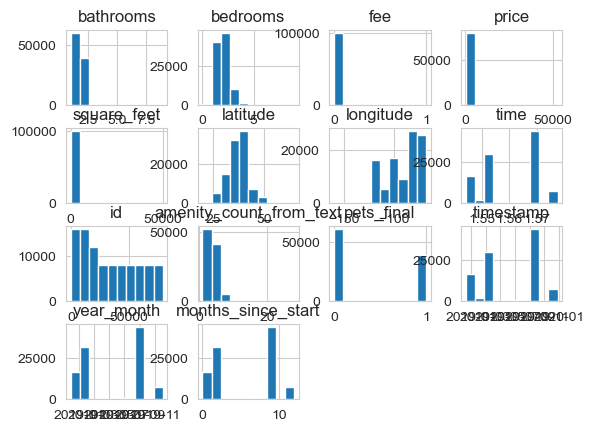

In [113]:
df_c2.hist()

======>>>>   praparing for training

In [114]:
# select features we need for training
features = [
    "square_feet", "bedrooms", "bathrooms", 
    "latitude", "longitude", "months_since_start",
    "amenity_count_from_text", "pets_final"
]

columns_needed = features + ["price"]

# create df_dev for training
df_train = df_c2.dropna(subset=columns_needed).copy()

In [115]:
df_train.dtypes

category                           object
title                              object
body                               object
amenities                          object
bathrooms                         float64
bedrooms                          float64
currency                           object
fee                                 int64
has_photo                          object
pets_allowed                       object
price                             float64
price_type                         object
square_feet                         int64
address                            object
cityname                           object
state                              object
latitude                          float64
longitude                         float64
source                             object
time                                int64
id                                  int64
text_combined                      object
text_location                      object
matched_city_from_text            

In [116]:
# define the X_eval 
X_eval = df_c2[df_c2["price"].isna()].copy()
X_eval = X_eval[["id"] + features].dropna()
ids = X_eval["id"].values
X_eval = X_eval[features]


In [117]:
# debug the 
X_eval.isna().sum()

square_feet                0
bedrooms                   0
bathrooms                  0
latitude                   0
longitude                  0
months_since_start         0
amenity_count_from_text    0
pets_final                 0
dtype: int64

In [118]:
# define the x, y
X = df_train[features]
y = df_train["price"]

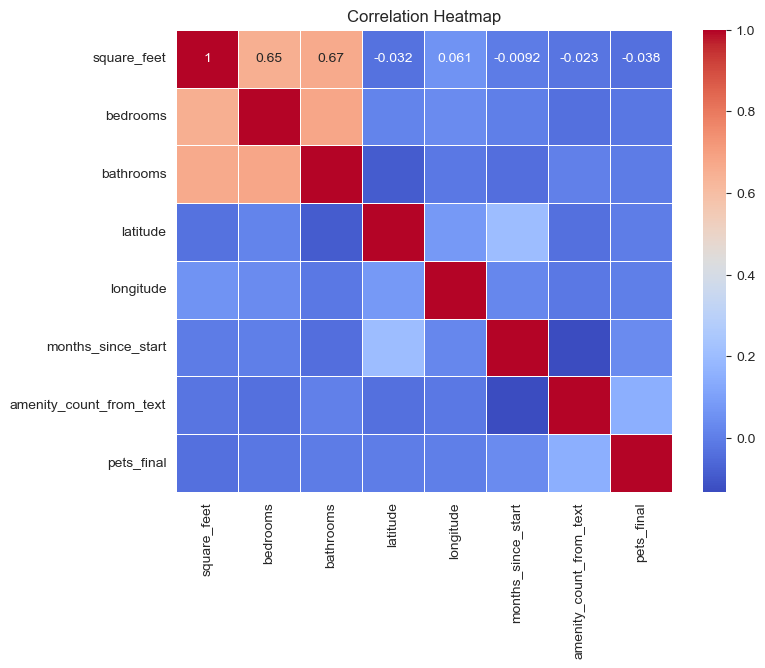

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'months_since_start'}>],
       [<Axes: title={'center': 'amenity_count_from_text'}>,
        <Axes: title={'center': 'pets_final'}>, <Axes: >]], dtype=object)

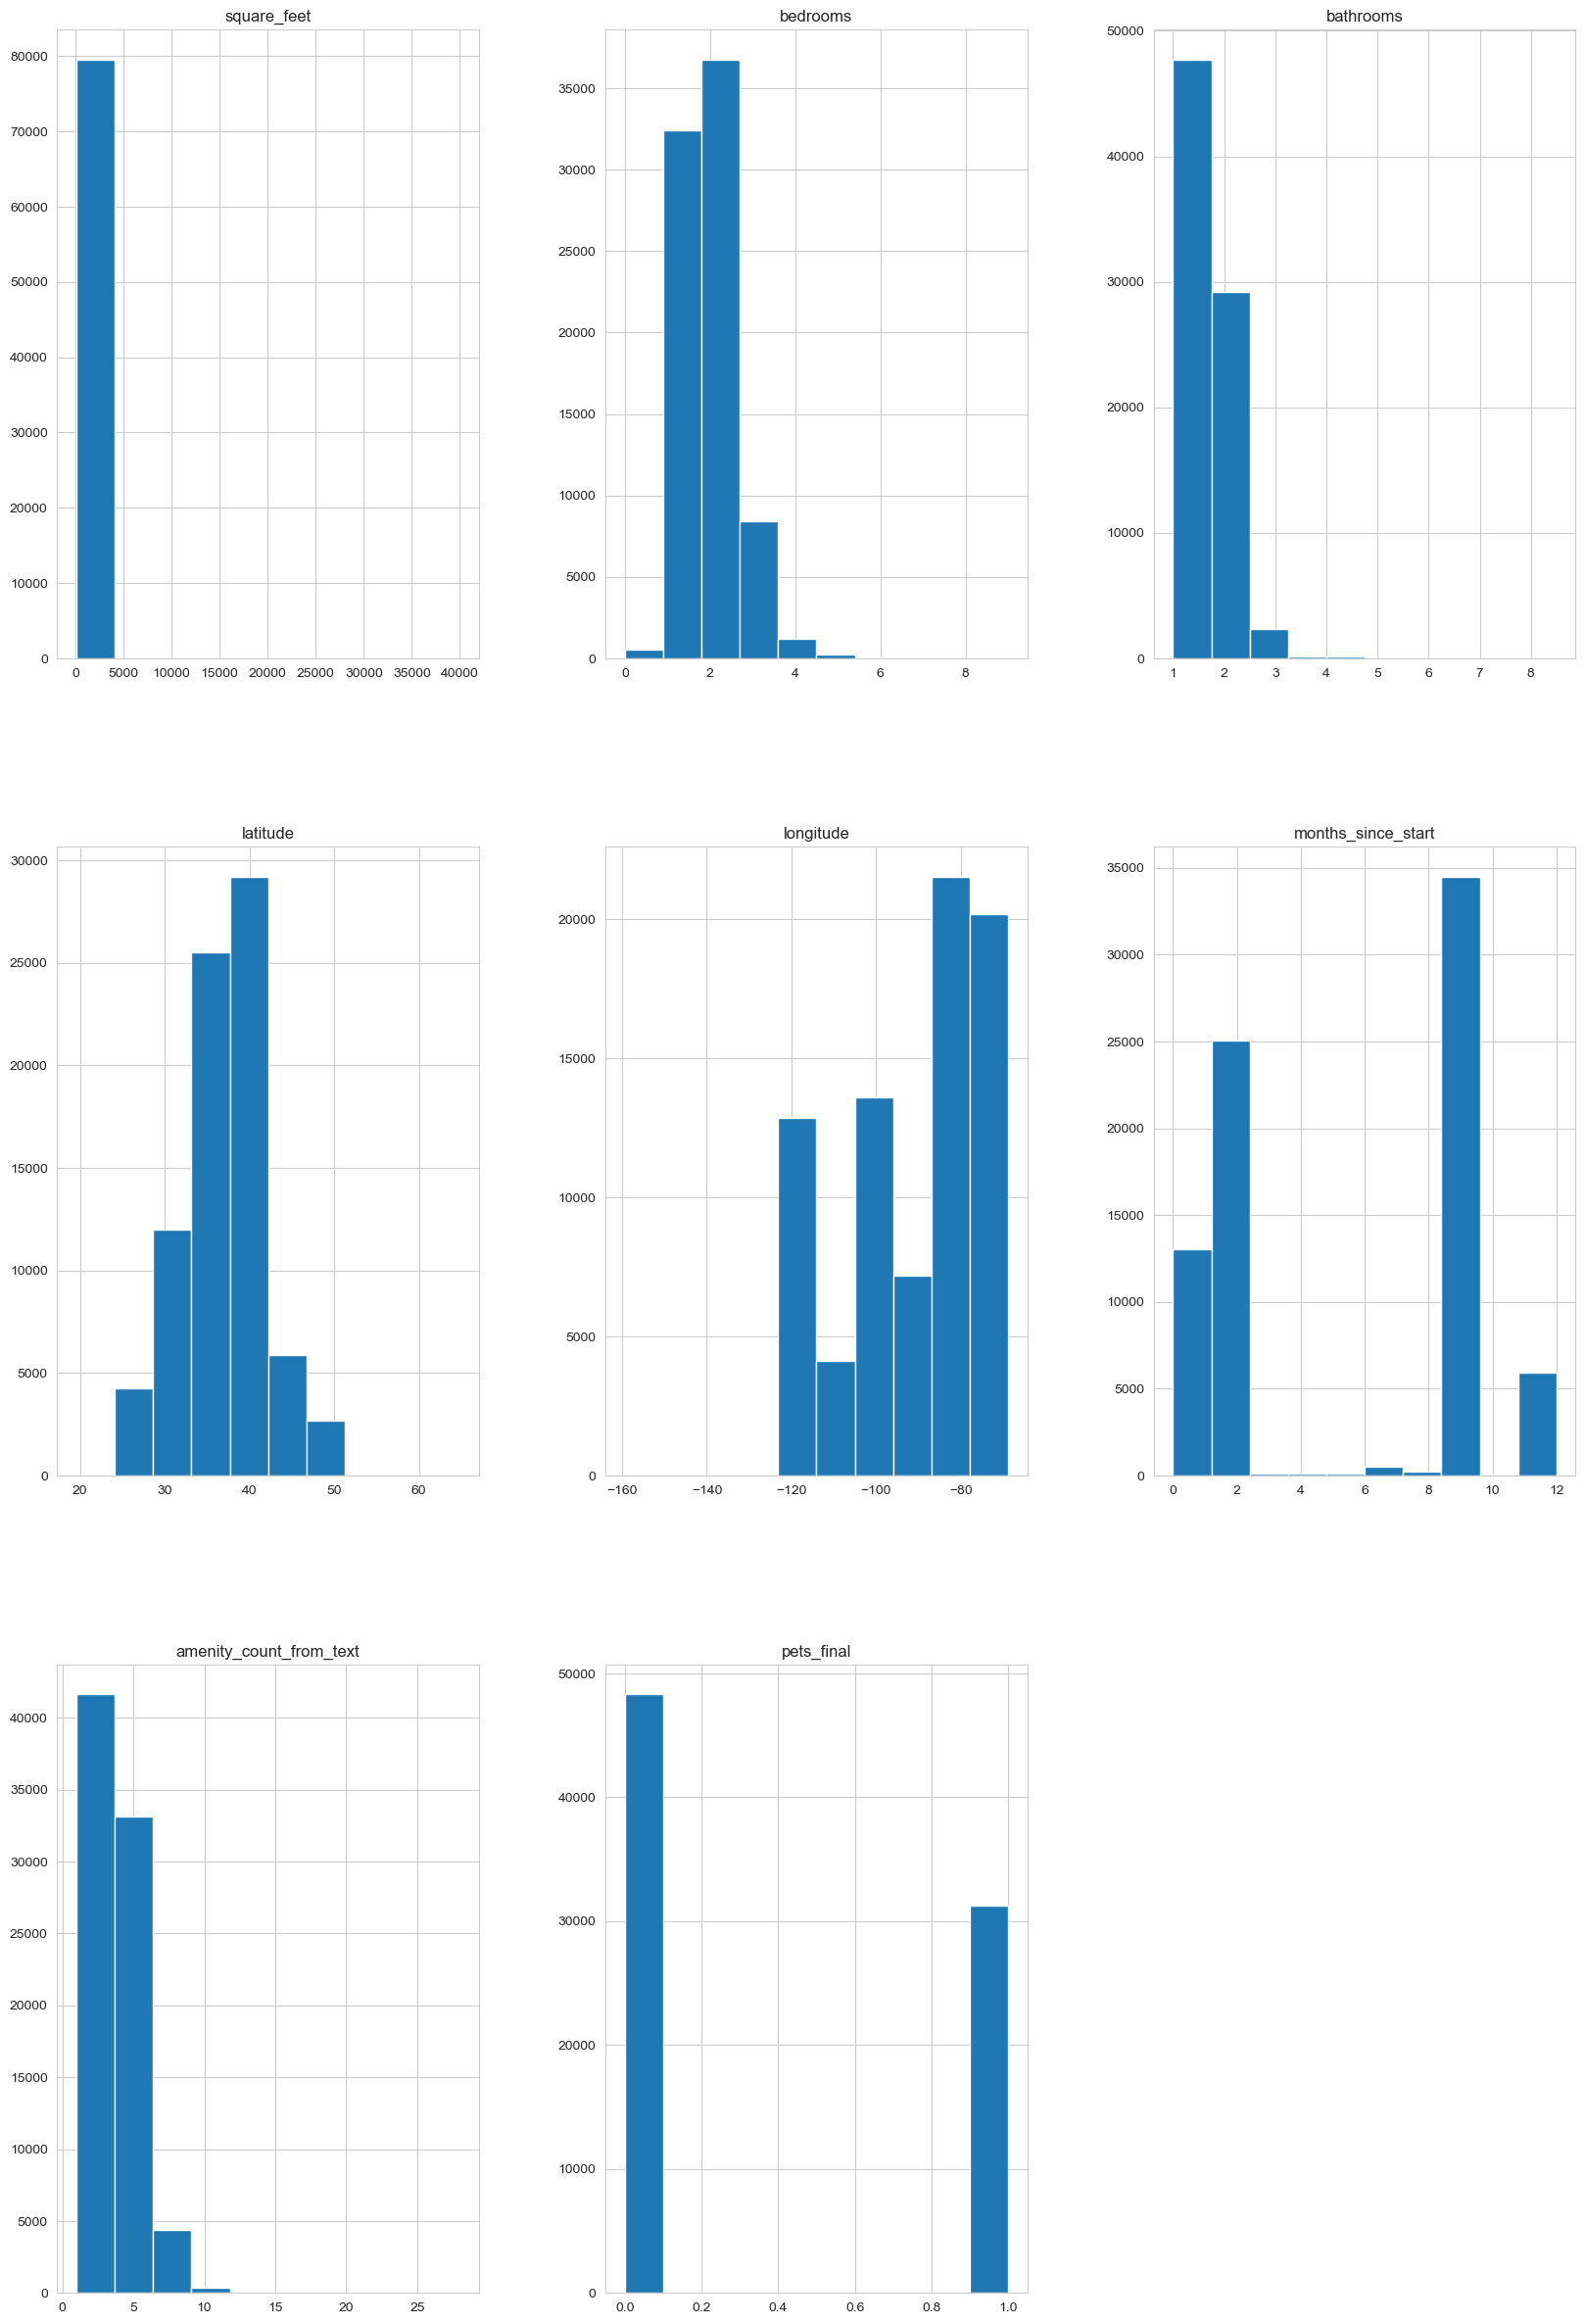

In [120]:
X.hist(figsize=(20,30))

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#creating model

Random Forest Regressor

MSE: 170591.2634
RMSE: 413.0270
MAE: 179.4761
R2 Score: 0.7788


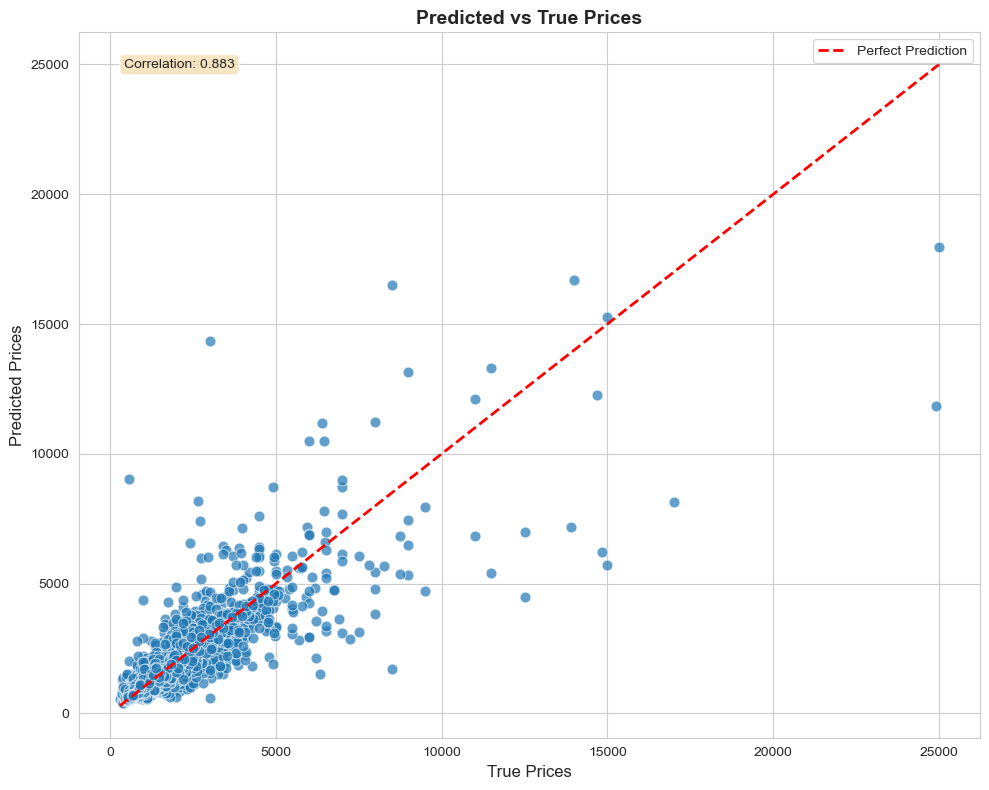

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing code
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = reg.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print metrics
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2 Score: {r2:.4f}')

# Create the predicted vs true prices graph
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.7, s=60)

# Add perfect prediction line (diagonal line)
min_val = min(min(y_val), min(y_pred))
max_val = max(max(y_val), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Customize the plot
plt.xlabel('True Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.title('Predicted vs True Prices', fontsize=14, fontweight='bold')
plt.legend()

# Add correlation coefficient to the plot
correlation = np.corrcoef(y_val, y_pred)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()


In [ ]:
importances = reg.feature_importances_

# Create a DataFrame for visualization
feature_names = X_train.columns
feat_importances = pd.Series(importances, index=feature_names)

# Select top N features for clarity
top_n = 20
top_features = feat_importances.nlargest(top_n)

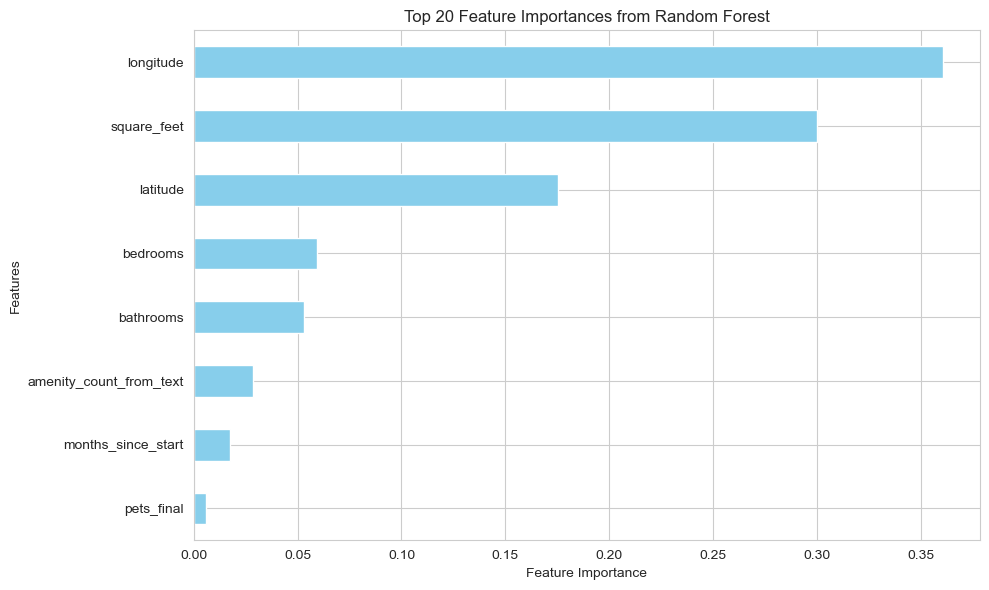

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(f'Top {top_n} Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
y_val_pred = reg.predict(X_val)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")

R² Score: 0.7788
MAE: 179.48


In [ ]:
sorted(zip(features, reg.feature_importances_), key=lambda x: x[1],reverse=True)

[('longitude', 0.36033423587004926),
 ('square_feet', 0.3001510645873742),
 ('latitude', 0.17525816169736336),
 ('bedrooms', 0.05923129311608678),
 ('bathrooms', 0.05302078575684758),
 ('amenity_count_from_text', 0.028465573484421795),
 ('months_since_start', 0.017572976374500567),
 ('pets_final', 0.005965909113356573)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

In [66]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    results[name] = {"R2": r2, "MAE": mae}
    print(f"{name}: R2 = {r2:.4f}, MAE = {mae:.2f}")

Random Forest: R2 = 0.7788, MAE = 179.48
Gradient Boosting: R2 = 0.6567, MAE = 301.00
Linear Regression: R2 = 0.2149, MAE = 496.46
KNN: R2 = 0.4320, MAE = 327.65


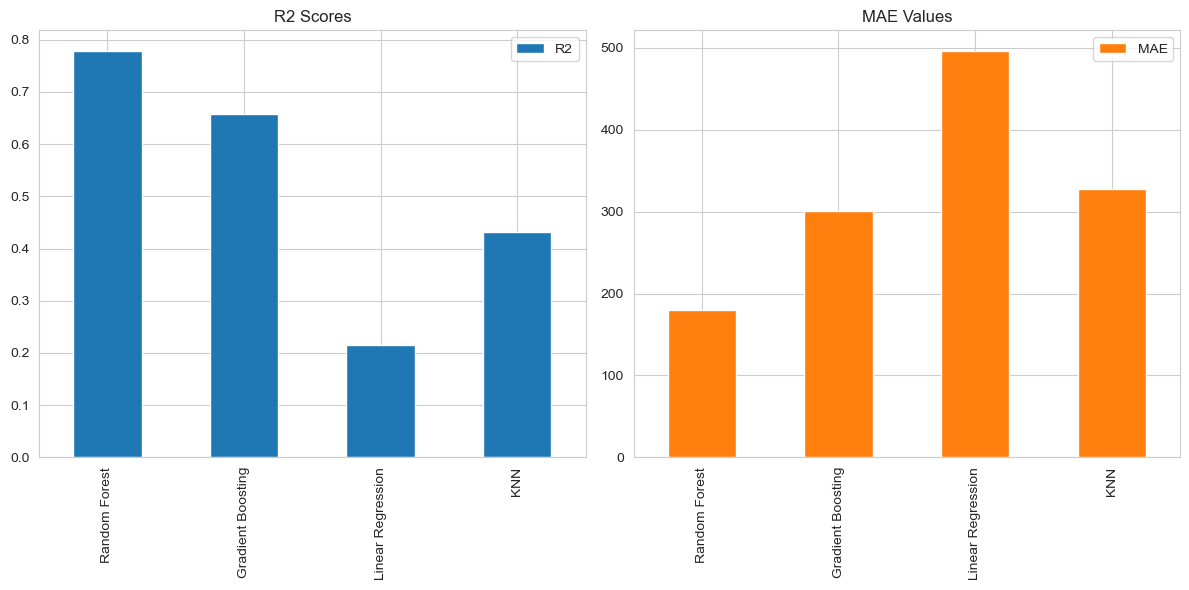

In [67]:
# Visualize comparison
result_df = pd.DataFrame(results).T
result_df[['R2', 'MAE']].plot(kind='bar', subplots=True, figsize=(12, 6), layout=(1, 2), title=['R2 Scores', 'MAE Values'])
plt.tight_layout()
plt.show()


In [69]:
predicted_prices = reg.predict(X_val)
true_prices = y_val

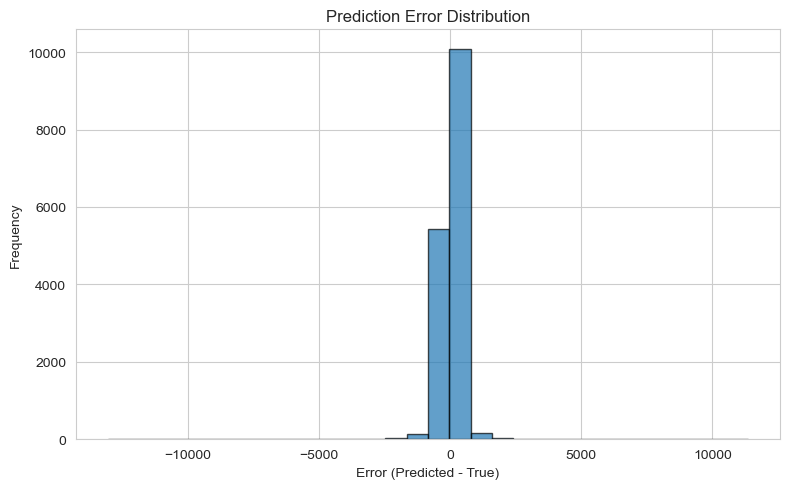

In [70]:
# Plot 2: Error Distribution
errors = predicted_prices - true_prices
plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, edgecolor='black', alpha=0.7)
plt.title("Prediction Error Distribution")
plt.xlabel("Error (Predicted - True)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig("error_distribution.png")  # Save the plot
plt.show()

In [ ]:
y_pred = reg.predict(X_eval)

submission = pd.DataFrame({
    "Id": ids,
    "Predicted": y_pred 
})
submission.to_csv("submission.csv", index=False)

In [58]:
corr_with_price = corr_matrix["price"].sort_values(ascending=False)
print(corr_with_price)

price                      1.000000
square_feet                0.386062
bathrooms                  0.318946
bedrooms                   0.230903
months_since_start         0.059216
latitude                   0.057596
fee                        0.020977
amenity_count_from_text   -0.005598
pets_final                -0.054917
longitude                 -0.106457
Name: price, dtype: float64
